Analysis of model regression of IBM simulated data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from foqal.utils.io import IO

In [3]:
io = IO.directory(
        # folder="ibmq-simulator_bell-state_local-projections_depolarized-channel",
        folder="2022-08-23_cross_val_dBe9",
        include_date=False, include_id=False, verbose=False,
    )

df = io.load_dataframe("model_summary.txt")
df

,model,m,p,latent_dim,train_loss,test_loss,test_std,lr,n_steps,uid
0,ClassicalCommonCause,5,0.0,100,0.000839,0.000851,2.172737e-05,0.25,500,e2d9e501a71c4a5a9aeda68497c2a859
1,Superdeterminism,5,0.0,100,0.000006,0.000030,3.389077e-06,0.25,500,b88391a1429849dba3ed76cf94043794
2,Superluminal,5,0.0,100,0.000005,0.000031,3.325813e-06,0.25,500,175ae9651c7c42638cfb27c8a2a44e0c
3,QuantumCommonCause,5,0.0,2,0.000014,0.000025,3.007023e-06,0.25,500,c6a667db1bd545c2ad1a8191f53efda8
4,ClassicalCommonCause,5,0.1,100,0.000276,0.000288,7.602672e-06,0.25,500,1a7afab211694b6eb695b671d5022f39
...,...,...,...,...,...,...,...,...,...,...
391,QuantumCommonCause,60,0.9,2,0.000040,0.000041,3.977237e-07,0.25,500,4f17a881ec88491bb261f776adba414a
392,ClassicalCommonCause,60,1.0,100,0.000013,0.000024,3.443125e-07,0.25,500,1bfa3e0995f94274aac2b1dd3146e027
393,Superdeterminism,60,1.0,100,0.000008,0.000028,5.783706e-07,0.25,500,4e8451da61d648d5bd2c629c9a56f3f0
394,Superluminal,60,1.0,100,0.000006,0.000031,2.976340e-07,0.25,500,cb3c072c16d9443faa1e6cecd027cbc7


In [5]:
for model in df['model'].unique():
    for m in df["m"].unique():
        for p in df["p"].unique():
            dfi = df[(df['model']==model) & (df['m'] == m) & (df['p'] == p)]
            print(len(dfi))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


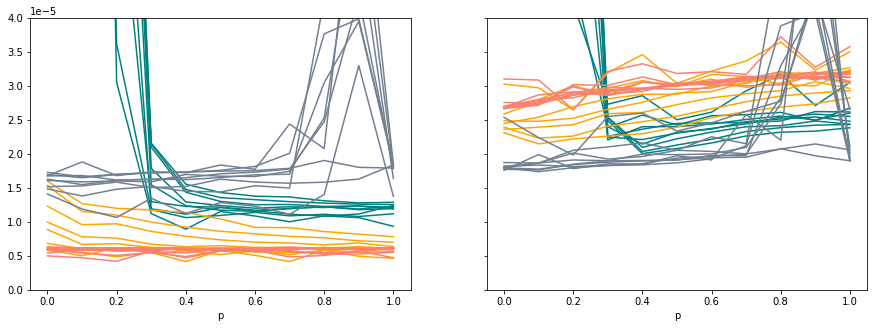

In [11]:
models = df['model'].unique()
colors = ['teal', 'orange', 'salmon', 'slategrey']

ms = df['m'].unique()
# ms = (30, )
ps = df['p'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15, 5], sharey='row')
for model, color in zip(models, colors):
    for m in ms:
        train = []
        test = []
        test_std = []
        for p in ps:
            dfi = df[(df['model']==model) & (df['m'] == m) & (df['p'] == p)]
            train.append(dfi[f'train_loss'].item())
            test.append(dfi[f'test_loss'].item())
            # test_std.append(dfi[f'test_std'].item())

        axs[0].plot(ps, train, color=color, label=f"{model}")
        axs[1].plot(ps, test, color=color)
        # axs[1].fill_between(ps, np.array(test)-np.array(test_std), np.array(test)+np.array(test_std), color=color, alpha=0.3)

# axs[0].legend()
for ax in axs:
    ax.set(xlabel='p')
    ax.set(ylim=[0, 0.00004])
    # ax.set_yscale('log')